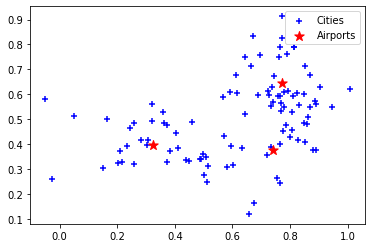

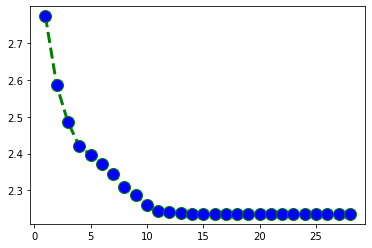

In [1]:
# Matthew Quinn
# CECS451
# Homework 5
# 9/28/2021
import random
import numpy as np

# finds the list of cities closest to each airports
def getClosestCities(cities, airports):
  closestCities = [] # this is from airports perspective
  copyOfCities = cities.copy()
  airportIndex = -1
  for i in range(0, num_air):
    c = []
    closestCities.append(c)

  while len(copyOfCities) != 0:
    current = copyOfCities.pop()
    distance = float('inf')
    cityMin = float('inf')
    # checks the distance of each city to each airport
    for i in range(0, num_air): 
      distance = (((current[0] - airports[i][0]) ** 2) + ((current[1] - airports[i][1]) ** 2))**0.5
      # if the distance from current city to airport i is smaller than any of the others so far, update airportIndex
      if distance < cityMin:
        cityMin = distance
        airportIndex = i

    closestCities[airportIndex].append(current)
  
  return closestCities

# calculates the gradient and returns an array of gradients. 
#gradient[0][0] is the gradient of the first airports.x and 
#gradient[0][1] is the graident of the first airports.y
def getGradient(airports, closestCities):
  gradient = []
  gradientX = 0
  gradientY = 0
  for i in range(num_air):
    gradientX = 0
    gradientY = 0
    for j in range(0, len(closestCities[i])):
      gradientX += 2*(airports[i][0] - closestCities[i][j][0])
      gradientY += 2*(airports[i][1] - closestCities[i][j][1])
    p = (gradientX, gradientY)
    gradient.append(p)
    
  return gradient


def getObjectiveValue(airports, closestCities):
  objectiveValue = 0
  for i in range(num_air):
    for j in range(0, len(closestCities[i])):
      objectiveValue += (((airports[i][0] - closestCities[i][j][0])**2) + ((airports[i][1] - closestCities[i][j][1])**2))
  return objectiveValue

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []
test = set()

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city // num_center)
    yc = np.random.normal(y, sigma, num_city // num_center)
    cities = cities.union(zip(xc, yc))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x, y))





closestCities = getClosestCities(cities, airports)
gradient = getGradient(airports, closestCities)
objectiveValue = getObjectiveValue(airports, closestCities)
xList = []
objectiveVals = []
numberOfLoops = 0
endVal = 0.0001
running = True
while running:
  
  numberOfLoops += 1
  xList.append(numberOfLoops)
  closestCities = getClosestCities(cities, airports)
  gradient = getGradient(airports, closestCities)
  for i in range(0, num_air):
    airports[i] = (airports[i][0] - (gradient[i][0] * 0.01), airports[i][1] - (gradient[i][1]*0.01))

    
  objectiveValue = getObjectiveValue(airports, closestCities)
  objectiveVals.append(objectiveValue)

  # Checks if all the gradients are extremely small, in which case the program will end
  endCount = 0
  for m in range(0, len(gradient)):
    if abs(gradient[m][0]) < endVal:
      endCount += 1
    if abs(gradient[m][1]) < endVal:
      endCount += 1
  if endCount == len(gradient)*2:
    running = False
 

import matplotlib.pyplot as plt
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.show()
plt.clf()


#[airport number][city number][x or y cord]
# closestCities[0][0][0]

x = np.array(xList)
y = np.array(objectiveVals)



plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
        marker='o', markerfacecolor='blue', markersize=12)
plt.show()